<a href="https://colab.research.google.com/github/MartinaEchtenbruck/DaLI-Basiskurs/blob/main/Hypothesentest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hypothesentest**

In diesem Jupyter Notebook werden wir die Hypothesen, die wir in Modul 2 formuliert haben untersuchen.

Die Durchführung von Hypothesentests ist sehr umfangreich. Es würde jedoch den Rahmen dieser Veranstaltung sprengen, auf alle Themen und Konzepte einzugehen, die mit einem solchen Hypothesentest einhergehen. Daher sind im Folgenden Inhalte, die über den Rahmen dieser Veranstaltung hinausgehen, als **optional** gekennzeichnet. Wer sich für die Inhalte interessiert, kann hier tiefer in die Materie einsteigen. Die inhaltliche Durchdringung der optionalen Inhalte ist jedoch **nicht notwendig** für die erfolgreiche Teilnahme an dieser Veranstaltung.

**Bitte beachten** Sie, dass die enthaltenen Codezeilen ausgeführt werden müssen. Wir empfehlen Ihnen, alle Codezeilen vor der Ausführung auszuführen. Wählen Sie dazu im Menü "Cell" den Punkt "Run all".

---

Um eine wissenschaftliche Untersuchung durchzuführen, bei der Hypothesen anhand eines Tests untersucht werden, gibt es für gewöhlich einen festen Ablauf mit einzelnen Schritten, die der Reihe nach durchzuführen sind. Üblicherweise sind dies die folgenden Schritte:


1.   Formulierung der Nullhypothese und der Alternativhypothese
2.   Teststatistik wählen
3.   Signifikanzniveau festlegen
4.   Nullverteilung der Teststatistik bestimmen
5.   Annahme und Ablehnungsbereich für die Nullhypothese bestimmen
6.   Teststatistik berechnen
7.   Das Ergebnis der Studie gemäß den Vorgaben aus 3. + 5. ermitteln.

Im Folgenden möchten wir unsere aufgestellten Hypothesen nun untersuchen und werden dazu die aufgeführten Schritte durchführen.
Versuchen Sie die Schritte nachzuvollziehen und soweit möglich auf Ihre eigenen Hypothesen anzuwenden.

Um unsere Hypothesen im Folgenden zu überprüfen starten wir zunächst, wie gehabt, mit dem Einlesen unserer Daten.

### Einlesen der Daten

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

# einlesen der Daten -- so wird es später abrufbar sein
#daten = pd.read_csv("UmweltLuftDaten.CSV", sep=';', header=0)

# für hier ziehen wir es aus dem GitHub
url = 'https://raw.githubusercontent.com/MartinaEchtenbruck/DaLI-Basiskurs/main/UmweltLuftDaten.CSV'
daten = pd.read_csv(url, sep=';', header=0)
daten

,Stationscode,Datum,Uhrzeit,Feinstaub,Ozon,Stickstoffdioxid,Luftqualitätsindex,Temperatur-mean,Temperatur-min,Temperatur-max,Niederschlag,Schneefall,Windrichtung,Windgeschwindigkeit,Spitzenwindboe,Luftdruck,Sonnenminuten
0,DENW053,01.11.2020,01:00,13.0,45.0,9.0,sehr gut,15.5,12.8,18.2,2.3,0.0,214.4,30.5,63.0,1012.0,0.0
1,DENW053,01.11.2020,02:00,13.0,33.0,13.0,sehr gut,15.5,12.8,18.2,2.3,0.0,214.4,30.5,63.0,1012.0,0.0
2,DENW053,01.11.2020,03:00,13.0,28.0,13.0,sehr gut,15.5,12.8,18.2,2.3,0.0,214.4,30.5,63.0,1012.0,0.0
3,DENW053,01.11.2020,04:00,13.0,41.0,7.0,sehr gut,15.5,12.8,18.2,2.3,0.0,214.4,30.5,63.0,1012.0,0.0
4,DENW053,01.11.2020,05:00,13.0,46.0,7.0,sehr gut,15.5,12.8,18.2,2.3,0.0,214.4,30.5,63.0,1012.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35039,DENW059,31.10.2021,21:00,6.0,51.0,9.0,sehr gut,13.0,9.0,17.9,11.6,0.0,172.1,17.0,78.0,1003.9,71.0
35040,DENW059,31.10.2021,22:00,6.0,59.0,7.0,sehr gut,13.0,9.0,17.9,11.6,0.0,172.1,17.0,78.0,1003.9,71.0
35041,DENW059,31.10.2021,23:00,6.0,45.0,NaN,sehr gut,13.0,9.0,17.9,11.6,0.0,172.1,17.0,78.0,1003.9,71.0
35042,DENW059,01.11.2021,24:00,6.0,39.0,9.0,sehr gut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Hypothese 1 -- Vorzeichentest

## 1. Formulierung der Nullhypothese und der Alternativhypothese

Als erstes möchten wir uns mit der Frage befassen ob die Tageszeit für die Feinstaubbelastung einen Unterschied macht. Die folgende Nullhypothese haben wir formuliert:

**Nullhypothese 1**: "*Es gibt keinen Unterschied zwischen der Feinstaubbelastung
der Luft am Tag und in der Nacht*"

Unsere Alternativhypothese lautet:

**Alternativhypothese 1**: "*Es gibt einen Unterschied zwischen der Feinstaubbelastung
der Luft am Tag und in der Nacht (Vermutung: tagsüber höher).*"




## 2. Teststatistik wählen

Eine Teststatistik ist eine Kennzahl, die aus den Stichprobendaten berechnet wird, um in einem statistischen Hypothesentest eine Entscheidung zu treffen. Sie fasst die Information der Daten in einer Zahl zusammen, anhand derer die Hypothese bewertet wird.

Es gibt verschiedene **mögliche** Testverfahren um diese Teststatistik $S$ zu berechnen:

* Vergleich der Stichprobenmittelwerte (gepaarter t-Test)
* Zählen der Anzahl der Datenpunkte, bei denen die Feinstaubbelastung am Tag höher ist als in der Nacht. (Vorzeichentest)
*   Berechnung ob es einen linearen Zusammenhang zwischen zwei Variablen gibt (Korrelationstest)

Wir betrachten im Folgenden den Vorzeichentest und ermitteln die Anzahl 𝑆 der Datenpaare, bei denen die Feinstaubbelastung am Tag höher ist als in der Nacht. Diesen Wert nennen wir 𝑆  (für Test**s**tatistik).

Beispiel: Am 1.11.2020 beträgt der Feinstaubwert für 7 Uhr morgens: $13$ und um 19 Uhr Abends: $11$. Die Differenz zwischen Tag und Nacht beträgt also: $13-11=2$. Dieser Wert ist positiv. Wenn wir nur ein einziges Datenpaar auswerten würden, dann wäre unser $S$ = 1.

Bevor dieser Wert aber für uns eine Bedeutung haben kann, müssen wir zunächst noch einen Blick auf unsere Experimentdaten werfen. Wieviele Datenpunkte betrachten wir insgesamt?

## **Optional**: Vorbereitung der Datensätze

Um die Hypothese zu untersuchen, betrachten wir zwei Gruppen von Feinstaubwerten, nämlich die der Feinstaubbelastung am Tag und der in der Nacht.

Für den Vorzeichentest müssen wir allerdings berücksichtigen, dass paarweise zusammengehörige Daten benötigt werden. Da unsere Daten nicht natürlich paarweise vorliegen müssen wir uns diese Paarungen entsprechend definieren. Eine naheliegende Möglichkeit ist es Tag und Nacht entsprechend ihres Verlaufs zusammenzuführen, also 7 Uhr Morgens mit 19 Uhr Abends und so weiter. Wir führen dabei Werte des Tages mit der darauffolgenden Nacht derselben Station zusammen.

Die zu bildenden Subsets müssen also paarweise zuordbar sein.
Um diese Subsets bilden zu können müssen wir für uns zunächst definieren was Tag ist und was Nacht. Die Zeitintervalle müssen dabei dieselbe Länge haben, um die paarweise zuordbarkeit zu gewährleisten.

Da es zur Definition von Tag und Nacht wohl verschiedene Meinungen gibt, versuchen wir Kernbereiche zu definieren die eindeutig Tag oder Nacht zuzuordnen sind. Im Folgenden wählen wir für den Tag den Zeitraum zwischen 7 Uhr und 17 Uhr und für die Nacht den Zeitraum zwischen 19 Uhr und 5 Uhr morgens.

#### Einen Datensatz je Stationscode erstellen

In [2]:
# falls wir verschiedene Stationscodes in den Daten haben, dann erstellen wir die Paarweisen Daten je Stationscode separat
daten['Stationscode'].unique()

array(['DENW053', 'DENW212', 'DENW211', 'DENW059'], dtype=object)

In [3]:
# Ein Set je Stationscode
daten_DENW053 = daten[daten['Stationscode'] == 'DENW053']
daten_DENW212 = daten[daten['Stationscode'] == 'DENW212']
daten_DENW211 = daten[daten['Stationscode'] == 'DENW211']
daten_DENW059 = daten[daten['Stationscode'] == 'DENW059']

# Die Sets nach Tag und Nacht Splitten
daten_tag_DENW053 = daten_DENW053.loc[(daten_DENW053['Uhrzeit'] >= '07:00') & (daten_DENW053['Uhrzeit'] <= '17:00')]
daten_nacht_DENW053 = daten_DENW053.loc[(daten_DENW053['Uhrzeit'] >= '19:00') | (daten_DENW053['Uhrzeit'] <= '05:00')]

daten_tag_DENW212 = daten_DENW212.loc[(daten_DENW212['Uhrzeit'] >= '07:00') & (daten_DENW212['Uhrzeit'] <= '17:00')]
daten_nacht_DENW212 = daten_DENW212.loc[(daten_DENW212['Uhrzeit'] >= '19:00') | (daten_DENW212['Uhrzeit'] <= '05:00')]

daten_tag_DENW211 = daten_DENW211.loc[(daten_DENW211['Uhrzeit'] >= '07:00') & (daten_DENW211['Uhrzeit'] <= '17:00')]
daten_nacht_DENW211 = daten_DENW211.loc[(daten_DENW211['Uhrzeit'] >= '19:00') | (daten_DENW211['Uhrzeit'] <= '05:00')]

daten_tag_DENW059 = daten_DENW059.loc[(daten_DENW059['Uhrzeit'] >= '07:00') & (daten_DENW059['Uhrzeit'] <= '17:00')]
daten_nacht_DENW059 = daten_DENW059.loc[(daten_DENW059['Uhrzeit'] >= '19:00') | (daten_DENW059['Uhrzeit'] <= '05:00')]

# Die Indizes reseten, damit python sich nicht die entstandenen Lücken merkt
daten_tag_DENW053 = daten_tag_DENW053.reset_index(drop=True)
daten_nacht_DENW053 = daten_nacht_DENW053.reset_index(drop=True)

daten_tag_DENW212 = daten_tag_DENW212.reset_index(drop=True)
daten_nacht_DENW212 = daten_nacht_DENW212.reset_index(drop=True)

daten_tag_DENW211 = daten_tag_DENW211.reset_index(drop=True)
daten_nacht_DENW211 = daten_nacht_DENW211.reset_index(drop=True)

daten_tag_DENW059 = daten_tag_DENW059.reset_index(drop=True)
daten_nacht_DENW059 = daten_nacht_DENW059.reset_index(drop=True)

#### Datenpaarungen für Stationscode DENW053 erstellen

In [4]:
print(pd.DataFrame({'Tag-Datum': daten_tag_DENW053['Datum'],
              'Tag-Uhrzeit': daten_tag_DENW053['Uhrzeit'],
              'Nacht-Datum': daten_nacht_DENW053['Datum'],
              'Nacht-Uhrzeit': daten_nacht_DENW053['Uhrzeit']}).head(n=6))

print(pd.DataFrame({'Tag-Datum': daten_tag_DENW053['Datum'],
              'Tag-Uhrzeit': daten_tag_DENW053['Uhrzeit'],
              'Nacht-Datum': daten_nacht_DENW053['Datum'],
              'Nacht-Uhrzeit': daten_nacht_DENW053['Uhrzeit']}).tail(n=6))

    Tag-Datum Tag-Uhrzeit Nacht-Datum Nacht-Uhrzeit
0  01.11.2020       07:00  01.11.2020         01:00
1  01.11.2020       08:00  01.11.2020         02:00
2  01.11.2020       09:00  01.11.2020         03:00
3  01.11.2020       10:00  01.11.2020         04:00
4  01.11.2020       11:00  01.11.2020         05:00
5  01.11.2020       12:00  01.11.2020         19:00
       Tag-Datum Tag-Uhrzeit Nacht-Datum Nacht-Uhrzeit
4010  31.10.2021       13:00  31.10.2021         20:00
4011  31.10.2021       14:00  31.10.2021         21:00
4012  31.10.2021       15:00  31.10.2021         22:00
4013  31.10.2021       16:00  31.10.2021         23:00
4014  31.10.2021       17:00  01.11.2021         24:00
4015         NaN         NaN  01.11.2021         01:00


Da wir für jede Station alle Werte des Tages gezogen haben Startet jeder unserer Datensätze am 1.11.2020 morgens um 1:00 Uhr. Da diese Werte nach unserer Paarung zu den Tag Werten des vorangegangenen Tage gehören, können wir diese nicht verwenden und verwerfen die Einträge.
Ähnliches liegt am Ende eines jeden Datensatzes vor. Der von uns definierte letzte Tag endet am 31.10.2021 um 17 Uhr. Für die Nacht enden die Werte aber bereits um 1:00 Uhr des Folgetages. Gemäß unserer Paarung haben wir also mehr Werte des letzen Tages als von der letzten Nacht. Wir schneiden auch hier passend ab.

In [5]:
# Die ersten 5 Einträge der Nacht rauswerfen
daten_nacht_DENW053 = daten_nacht_DENW053.drop([0,1,2,3,4], axis=0, inplace=False)

# die letzten 4 Einträge des Tages rauswerfen
daten_tag_DENW053 = daten_tag_DENW053.drop([4011,4012,4013,4014], axis=0, inplace=False)

# Den Index zurücksetzen, damit python sich nicht die Lücken merkt
daten_nacht_DENW053 = daten_nacht_DENW053.reset_index(drop=True)

In [6]:
pd.DataFrame({'Tag-Datum': daten_tag_DENW053['Datum'],
              'Tag-Uhrzeit': daten_tag_DENW053['Uhrzeit'],
              'Nacht-Datum': daten_nacht_DENW053['Datum'],
              'Nacht-Uhrzeit': daten_nacht_DENW053['Uhrzeit']})


,Tag-Datum,Tag-Uhrzeit,Nacht-Datum,Nacht-Uhrzeit
0,01.11.2020,07:00,01.11.2020,19:00
1,01.11.2020,08:00,01.11.2020,20:00
2,01.11.2020,09:00,01.11.2020,21:00
3,01.11.2020,10:00,01.11.2020,22:00
4,01.11.2020,11:00,01.11.2020,23:00
...,...,...,...,...
4006,31.10.2021,09:00,31.10.2021,21:00
4007,31.10.2021,10:00,31.10.2021,22:00
4008,31.10.2021,11:00,31.10.2021,23:00
4009,31.10.2021,12:00,01.11.2021,24:00


Die Werte passen nun paarweise zusammen. Da für die anderen Stationscodes der exakt selbe Zeitraum vorliegt, kann hier genau dasselbe vorgehen angewendet werden.

#### Datenpaarungen für Stationscode DENW212 erstellen

In [7]:
# Die ersten 5 Einträge der Nacht rauswerfen
daten_nacht_DENW212 = daten_nacht_DENW212.drop([0,1,2,3,4], axis=0, inplace=False)

# die letzten 4 Einträge des Tages rauswerfen
daten_tag_DENW212 = daten_tag_DENW212.drop([4011,4012,4013,4014], axis=0, inplace=False)

# Den Index zurücksetzen, damit python sich nicht die Lücken merkt
daten_nacht_DENW212 = daten_nacht_DENW212.reset_index(drop=True)

pd.DataFrame({'Tag-Datum': daten_tag_DENW212['Datum'],
              'Tag-Uhrzeit': daten_tag_DENW212['Uhrzeit'],
              'Nacht-Datum': daten_nacht_DENW212['Datum'],
              'Nacht-Uhrzeit': daten_nacht_DENW212['Uhrzeit']})

,Tag-Datum,Tag-Uhrzeit,Nacht-Datum,Nacht-Uhrzeit
0,01.11.2020,07:00,01.11.2020,19:00
1,01.11.2020,08:00,01.11.2020,20:00
2,01.11.2020,09:00,01.11.2020,21:00
3,01.11.2020,10:00,01.11.2020,22:00
4,01.11.2020,11:00,01.11.2020,23:00
...,...,...,...,...
4006,31.10.2021,09:00,31.10.2021,21:00
4007,31.10.2021,10:00,31.10.2021,22:00
4008,31.10.2021,11:00,31.10.2021,23:00
4009,31.10.2021,12:00,01.11.2021,24:00


#### Datenpaarungen für Stationscode DENW211 erstellen



In [8]:
# Die ersten 5 Einträge der Nacht rauswerfen
daten_nacht_DENW211 = daten_nacht_DENW211.drop([0,1,2,3,4], axis=0, inplace=False)

# die letzten 4 Einträge des Tages rauswerfen
daten_tag_DENW211 = daten_tag_DENW211.drop([4011,4012,4013,4014], axis=0, inplace=False)

# Den Index zurücksetzen, damit python sich nicht die Lücken merkt
daten_nacht_DENW211 = daten_nacht_DENW211.reset_index(drop=True)

pd.DataFrame({'Tag-Datum': daten_tag_DENW211['Datum'],
              'Tag-Uhrzeit': daten_tag_DENW211['Uhrzeit'],
              'Nacht-Datum': daten_nacht_DENW211['Datum'],
              'Nacht-Uhrzeit': daten_nacht_DENW211['Uhrzeit']})

,Tag-Datum,Tag-Uhrzeit,Nacht-Datum,Nacht-Uhrzeit
0,01.11.2020,07:00,01.11.2020,19:00
1,01.11.2020,08:00,01.11.2020,20:00
2,01.11.2020,09:00,01.11.2020,21:00
3,01.11.2020,10:00,01.11.2020,22:00
4,01.11.2020,11:00,01.11.2020,23:00
...,...,...,...,...
4006,31.10.2021,09:00,31.10.2021,21:00
4007,31.10.2021,10:00,31.10.2021,22:00
4008,31.10.2021,11:00,31.10.2021,23:00
4009,31.10.2021,12:00,01.11.2021,24:00


#### Datenpaarungen für Stationscode DENW059 erstellen

In [9]:
# Die ersten 5 Einträge der Nacht rauswerfen
daten_nacht_DENW059 = daten_nacht_DENW059.drop([0,1,2,3,4], axis=0, inplace=False)

# die letzten 4 Einträge des Tages rauswerfen
daten_tag_DENW059 = daten_tag_DENW059.drop([4011,4012,4013,4014], axis=0, inplace=False)

# Den Index zurücksetzen, damit python sich nicht die Lücken merkt
daten_nacht_DENW059 = daten_nacht_DENW059.reset_index(drop=True)

pd.DataFrame({'Tag-Datum': daten_tag_DENW059['Datum'],
              'Tag-Uhrzeit': daten_tag_DENW059['Uhrzeit'],
              'Nacht-Datum': daten_nacht_DENW059['Datum'],
              'Nacht-Uhrzeit': daten_nacht_DENW059['Uhrzeit']})

,Tag-Datum,Tag-Uhrzeit,Nacht-Datum,Nacht-Uhrzeit
0,01.11.2020,07:00,01.11.2020,19:00
1,01.11.2020,08:00,01.11.2020,20:00
2,01.11.2020,09:00,01.11.2020,21:00
3,01.11.2020,10:00,01.11.2020,22:00
4,01.11.2020,11:00,01.11.2020,23:00
...,...,...,...,...
4006,31.10.2021,09:00,31.10.2021,21:00
4007,31.10.2021,10:00,31.10.2021,22:00
4008,31.10.2021,11:00,31.10.2021,23:00
4009,31.10.2021,12:00,01.11.2021,24:00


#### Die Datensätze wieder zu einem Gesamt-Datensatz zusammensetzen

In [10]:
# Je Stationscode ein DataFrame erstellen mit einer Spalte: Feinstaubwerte am Tag und einer Spalte: Feinstaubwerte in der Nacht
daten_DENW053 = pd.DataFrame({'Feinstaub_Tag': daten_tag_DENW053['Feinstaub'],
                              'Feinstaub_Nacht': daten_nacht_DENW053['Feinstaub']})

daten_DENW212 = pd.DataFrame({'Feinstaub_Tag': daten_tag_DENW212['Feinstaub'],
                              'Feinstaub_Nacht': daten_nacht_DENW212['Feinstaub']})

daten_DENW211 = pd.DataFrame({'Feinstaub_Tag': daten_tag_DENW211['Feinstaub'],
                              'Feinstaub_Nacht': daten_nacht_DENW211['Feinstaub']})

daten_DENW059 = pd.DataFrame({'Feinstaub_Tag': daten_tag_DENW059['Feinstaub'],
                              'Feinstaub_Nacht': daten_nacht_DENW059['Feinstaub']})

# Die vier einzelnen Tabellen zu einer Gesamttabelle mit zwei Spalten zusammen fügen
daten_gesamt = pd.concat([daten_DENW053, daten_DENW212, daten_DENW211, daten_DENW059], axis=0)

# Wir fixen die Zeilennummerierung
daten_gesamt.reset_index(drop=True, inplace=True)
daten_gesamt

,Feinstaub_Tag,Feinstaub_Nacht
0,13.0,11.0
1,13.0,10.0
2,13.0,10.0
3,13.0,10.0
4,13.0,10.0
...,...,...
16039,9.0,6.0
16040,8.0,6.0
16041,8.0,6.0
16042,8.0,6.0


Wir haben jetzt den benötigten Datensatz mit einer Spalte Feinstaubwerte am Tag und einer Spalte Feinstaubwerte in der Nacht so in der Tabelle abgelegt, dass die paarweise zusammengehörigen Werte jeweils in derselben Zeile liegen.

Nun haben wir die zwei separaten Datensets, jetzt müssen wir sie so zusammenbringen, dass sie wie geplant paarweise zusammenkommen, also Der Eintrag vom 1.11.2020 um 7 Uhr findet zum 1.11.2020 um 19 Uhr und so weiter.

Wie die Ausgabe oben zeigt startet der Datensatz für die Nacht um 1 Uhr morgens. Damit es zum Datensatz für den Tag passt, der um 7 Uhr startet, müssen wir die ersten fünf Einträge vom Nacht-Datensatz rauswerfen:

In der Ausgabe kann man bereits erkennen, dass es nicht überall passt. In Zeile 16055 ist 13 Uhr am 31.10. neben 22 Uhr desselben Tages gelegt worden, es müsste aber 1 Uhr morgens des nächsten Tages sein.

## Unsere Experimentdaten

Nach der Vorbereitung der Daten erhalten wir unsere Experimentdaten. Dise sind im DataFrame 'daten_gesamt' abgelegt und umfassen 16044 Datenpaare mit Feinstaubwerten für den Tag und die Nacht:

In [25]:
daten_gesamt

,Feinstaub_Tag,Feinstaub_Nacht,Feinstaub_Differenz
0,13.0,11.0,2.0
1,13.0,10.0,3.0
2,13.0,10.0,3.0
3,13.0,10.0,3.0
4,13.0,10.0,3.0
...,...,...,...
16039,9.0,6.0,3.0
16040,8.0,6.0,2.0
16041,8.0,6.0,2.0
16042,8.0,6.0,2.0


## 3. Signifikanzniveau festlegen

Mit einem Hypothesentest kann die Nullhypothese nie mit 100%iger Sicherheit verworfen oder bestätigt werden. Es besteht immer eine Irrtumswahrscheinlichkeit. Das liegt daran, dass für die Analyse immer eine Stichprobe aus der Grundgesamtheit gezogen wird.

Wir haben unsere Stichprobe so festgelegt, dass wir die stündlichen Werte von 4 Kölner Messstationen über den Zeitraum eines Jahres betrachten. Eine andere Stichprobe (z.B. ein anderes Jahr oder eine andere Messstation) liefert vielleicht andere Ergebnisse. Daher ist jede Aussage über eine Hypothese immer mit einer Irrtumswahrscheinlichkeit behaftet.

Diese Irrtumswahrscheinlichkeit wird als Signifikanzniveau ($α$) bezeichnet.
Das **Signifikanzniveau** wird immer vor der Analyse bestimmt. Es liegt häufig zwischen 1&#8239;% und 5&#8239;%. Bei einem Signifikanzniveau von 5&#8239;% ($α=0,05$) besteht ein Risiko von 5&#8239;%, dass die Nullhypothese verworfen wird, obwohl sie eigentlich wahr ist.

Für diese Untersuchung legen wir das Signifikanzniveau auf $α=0,05$.




## 6. Teststatistik berechnen

Der Nachvollziehbarkeit halber weichen wir hier ein wenig von der üblichen Reihenfolge ab und berechnen zunächst die Teststatistik $S$.

$S$ haben wir uns zuvor definiert als: die Anzahl der Datenpunkte, bei denen die Feinstaubbelastung am Tag höher ist als in der Nacht. Wir berechnen als zunächst die Differenz zwischen den Tag- und Nachtwerten:

In [12]:
daten_gesamt['Feinstaub_Differenz'] = daten_gesamt['Feinstaub_Tag'] - daten_gesamt['Feinstaub_Nacht']

daten_gesamt.head(n=10)

,Feinstaub_Tag,Feinstaub_Nacht,Feinstaub_Differenz
0,13.0,11.0,2.0
1,13.0,10.0,3.0
2,13.0,10.0,3.0
3,13.0,10.0,3.0
4,13.0,10.0,3.0
5,12.0,10.0,2.0
6,12.0,10.0,2.0
7,12.0,10.0,2.0
8,12.0,10.0,2.0
9,12.0,9.0,3.0


Nun können wir die Anzahl $S$ der positiven differenzen zählen:

In [13]:
# Zähle, wie oft die Differenz positiv ist
positiv = (daten_gesamt['Feinstaub_Differenz'] > 0).sum()
negativ = (daten_gesamt['Feinstaub_Differenz'] < 0).sum()
null = (daten_gesamt['Feinstaub_Differenz'] == 0).sum()

# Ausgabe der Ergebnisse
print(f"Bei {positiv} Datenpaaren ist die Feinstaubbelastung am Tag größer als in der Nacht.")
print(f"Bei {null} Datenpaaren ist die Feinstaubbelastung am Tag gleich der in der Nacht.")
print(f"Bei {negativ} Datenpaaren ist die Feinstaubbelastung am Tag kleiner als in der Nacht.")

Bei 6772 Datenpaaren ist die Feinstaubbelastung am Tag größer als in der Nacht.
Bei 2168 Datenpaaren ist die Feinstaubbelastung am Tag gleich der in der Nacht.
Bei 6833 Datenpaaren ist die Feinstaubbelastung am Tag kleiner als in der Nacht.


Nun liegt uns die Teststatistik $S$, die Anzahl der Datenpunkte, bei denen die Feinstaubbelastung am Tag höher ist als in der Nacht, vor:

$S$ = 6772

## Erste Betrachtung des Ergebnisses

Unsere Experimentdaten umfassen 16044 Datenpaare. Davon sind bei 6772 Datenpaaren die Werte für den Tag größer als für die Nacht (positive Differenz). Damit erhalten wir für unsere Teststatistik den Wert: $S=6772$, die Anzahl der positiven Differenzen.

Die positiven Differenzen könnten jetzt allerdings durch natürliche Schwankungen zu erklären sein (zufälliges Rauschen) oder dadurch, dass es vielleicht doch einen Unterschied zwischen der Feinstaubbelastung am Tag und in der Nacht gibt.

Wir müssen nun herausfinden, ob der von uns ermittelte Wert $S$ auf ein zufälliges Rauschen zurückzuführen ist und wir die Nullhypothese nicht verwerfen können oder ob dieser Wert ausreicht, um zu belegen, dass es einen Unterschied zwischen der Feinstaubbelastug am Tag und in der Nacht gibt. Dafür schauen wir uns die Nullverteilung an.



## 4. Nullverteilung der Teststatistik bestimmen

Die Nullverteilung zeigt, wie wahrscheinlich das Auftreten eines bestimmten Wertes für $S$ ist, unter der Annahme, dass die Nullhypothese wahr ist bzw. dass die Schwankungen im Vorzeichen auf Zufall beruhen. Die Nullverteilung ist also eine Wahrscheinlichkeitsverteilung.

Die Nullverteilung des Vorzeichentests folgt einer **Binomialverteilung**, da der Vorzeichentest im Wesentlichen auf dem Zählen von Erfolgen (positiven Differenzen) und Misserfolgen (negativen Differenzen) basiert, die zwei mögliche Ergebnisse darstellen – ähnlich wie bei einem binomialen Zufallsexperiment.

Die Binomialverteilung ist eine der wichtigsten diskreten Wahrscheinlichkeitsverteilungen. Sie beschreibt die Wahrscheinlichkeiten für die Anzahl der Erfolge in einer Serie von gleichartigen Experimenten, die nur 2 mögliche Ergebnisse haben. Man nennt diese Art von Experimenten auch Binomischen Zufallsexperiment (oder Bernoulli Experiment).

#### **Optional**: Binomialverteilung (Hintergrund & Erklärung)

Dies sind die Eigenschaften eines Binomischen Zufallsexperiments wie bspw. dem Münzwurf:

*   **Anzahl der Versuche**: Man führt ein Experiment **n**-mal durch (z. B. man wirft  10-mal eine Münze).
*   **Zwei mögliche Ergebnisse**: Bei jedem Experiment gibt es **nur zwei mögliche Ergebnisse**: Erfolg oder Misserfolg (z. B. Kopf oder Zahl bei einer Münze). Der Erfolg muss nicht unbedingt „gut“ sein; es geht nur darum, ein bestimmtes Ergebnis zu zählen.
*   **Wahrscheinlichkeit eines Erfolgs**: Die Wahrscheinlichkeit eines Erfolgs bei jedem einzelnen Versuch ist immer dieselbe (z. B. bei einer fairen Münze liegt die Wahrscheinlichkeit Zahl zu werfen bei 50% für Kopf).
*   **Zählung der Erfolge**: Die Binomialverteilung sagt dir, wie wahrscheinlich es ist, dass du in diesen n Versuchen genau k Erfolge erzielst (z. B. wie wahrscheinlich es ist, bei 10 Münzwürfen genau 7-mal Kopf zu bekommen).

Die Wahrscheinlichkeit, genau k Erfolge in n Versuchen zu bekommen, wird durch die Binomialformel berechnet.

Wer sich weiter in die Binomialverteilung einlesen möchte kann dies hier tun:
*   https://de.wikipedia.org/wiki/Binomialverteilung
*   https://studyflix.de/statistik/binomialverteilung-1118

Anschaulich lässt sich die Binomialverteilung anhand eines Galtonbetretts herleiten. Das Galtonbrett gleicht dabei einem Kugelspiel, bei dem man die Kugel oben in das Spiel wirft. Das Spiel hat **n** Ebenen mit **n** Hindernissen (wie bspw. einen Nagel) auf den die Kugel stößt und daraufhin mit einer Wahrscheinlichkeit von 50 % nach rechts bzw. nach links fällt.
Betrachtet man alle möglichen Wege, die die Kugel dabei nehmen kann, dann kann man hieraus auch die Wahrscheinlichkeit ableiten, mit der ein bestimmtes 𝑆 (die Kugel fällt nach rechts) auftritt.

Das Galtonbrett ist eine sehr anschauliche Methode die Binomialverteilung zu erklären. Wer mehr zum Galtonbrett lesen möchte kann diese hier tun:
*   https://de.wikipedia.org/wiki/Galtonbrett



#### **Optional**: Binomialverteilung am kleinen Beispiel

Um diese Verteilung besser verstehen zu können schauen wir uns zunächst die Binomialverteilung für p=0,5 und n=10 an. Dies entspräche für unser Experiment der Fragestellung: Wir vergleichen 10 Datenpaare der Feinstaubbelastung, unter der Annahme, dass es keinen Unterschied in der Feinstaubbelastung am Tag und in der Nacht gibt: wie wahrscheinlich ist es, dass die differenz k-mal oder öfters positiv ist?

Der folgende Code berechnet uns die zugehörige Binomialverteilung und erstellt einen Plot der berechneten Wahrscheinlichkeiten:

[0.00097656 0.00976563 0.04394531 0.1171875  0.20507812 0.24609375
 0.20507812 0.1171875  0.04394531 0.00976563 0.00097656]


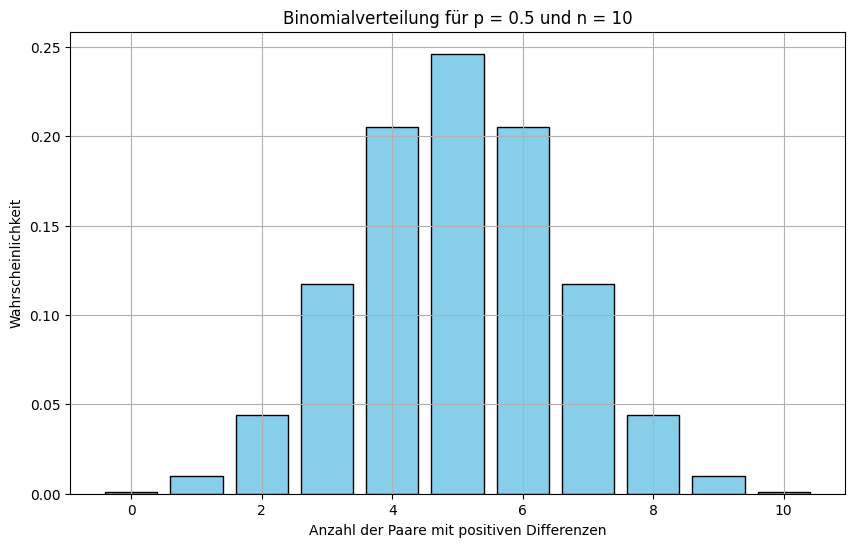

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameter der Binomialverteilung
n = 10  # Anzahl der Versuche
wkeit = 0.5    # Wahrscheinlichkeit für Erfolg

# Welche möglichen Ergebnisse kann das Experiment haben?
# Erstelle einen Vektor mit den Werten von 0 bis 10
S = np.arange(0, n+1)

# Berechnung der Binomialverteilung
# Wie zuvor beschrieben ist die Binomialverteilung über eine Formel berechenbar.
# Die Funktion pmf im scipy.stats Paket berechnet die Wahrscheinlichkeiten für
# die verschiedenen Werte, die S annehmen könnte unter Angabe der
# Anzahl Versuche (n) und der Wahrscheinlichkeit (wkeit) für einen Erfolg.
binom_dist_klein = binom.pmf(S, n, wkeit)

print(binom_dist_klein)

# Die folgenden Zeilen erstellen den Plot, der die Wahrscheinlichkeiten für das
# Auftreten eines bestimmten Wertes für S zeigt.
plt.figure(figsize=(10, 6))
plt.bar(S, binom_dist_klein, width=0.8, color='skyblue', edgecolor='black')
plt.title(f'Binomialverteilung für p = {wkeit} und n = {n}')
plt.xlabel('Anzahl der Paare mit positiven Differenzen')
plt.ylabel('Wahrscheinlichkeit')
plt.grid(True)
plt.show()

Der Plot zeigt, mit welcher Wahrscheinlichkeit bei unserem Experiment ein bestimmter Wert für $S$ herauskommt, unter der Annahme, dass die Nullhypothese gilt.

Für unser Mini-Experiment, bei dem wir nur 10 Datenpaare betrachten, gibt es 11 Mögliche Werte, die unser $S$ annehmen kann: 0, 1, 2, ..., 10.
Wenn die Nullhypthese zutrifft, dann sind Ergebnisse für $S$ von etwa 4,5 oder 6 am wahrscheinlichsten. Abweichungen zu den Randbereichen in beiden Richtungen sind unwahrscheinlicher.

In [15]:
# Die zugehörigen Werte sind in dem array 'binom_dist_klein' hinterlegt.
# Wir lassen uns die dargestellten Werte ausgeben:

print("  S    Wahrscheinlichkeit")
print("------------")
for i, wkeit in enumerate(binom_dist_klein):
    # Gib i zweistellig aus und die Wahrscheinlichkeitswerte mit 6 Stellen
    # vor und 2 nach dem Komma
    print(f"{i:2} {wkeit*100:6.2f} %")

  S    Wahrscheinlichkeit
------------
 0   0.10 %
 1   0.98 %
 2   4.39 %
 3  11.72 %
 4  20.51 %
 5  24.61 %
 6  20.51 %
 7  11.72 %
 8   4.39 %
 9   0.98 %
10   0.10 %


Mithilfe der Binomialverteilung lässt sagen, mit welcher Wahrscheinlichkeit ein bestimmtes $S$ zu erwarten ist. In der vorangegangenen Ausgabe sind die Wahrscheinlichkeiten für alle möglichen Werte, die $S$ annehmen könnte aufgelistet. Die Summer dieser Wahrscheinlichkeiten ist immer 1.

Angenommen die Frage lautet: "Wie wahrscheinlich ist es, dass die Differenz in 8 oder mehr Fällen positiv ist?" Dann erhalten wir die Antwort durch die Aufsummierung der letzten drei Balken:

Die Werte sind: 0,0439 + 0,0098 + 0,001 = 0,0547 und das entspricht einer Wahrscheinlichkeit von 5,47%, dass, unter Annahme der Nullhypothese, ein $S$ von 8 oder größer auftritt.

#### Nullverteilung der Teststatistik bestimmen

Im Falle unseres Experimentes betrachten wir einen Datensatz von 16044 Datenpaaren. Die Nullverteilung liegt der Annahme zugrunde, dass die Nullhypothese stimmt. Das bedeutet, dass positive und negative Vorzeichen bei der Differenzbildung nur dem Zufall zuzuschreiben sind und wir also mit gleicher Wahrscheinlichkeit positive wie negative Vorzeichen erwarten (wkeit=0,5).

Der folgende Code generiert die Binomialverteilung für unser Experiment:

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameter der Binomialverteilung
n = positiv+negativ  # Anzahl der Versuche
wkeit = 0.5    # Wahrscheinlichkeit für Erfolg

# Welche möglichen Ergebnisse kann das Experiment haben?
# Erstelle einen Vektor mit den Werten von 0 bis 16044
x = np.arange(0, n+1)

# Berechnung der Binomialverteilung
# Wie zuvor beschrieben ist die Binomialverteilung über eine Formel berechenbar.
# Die Funktion pmf im scipy.stats Paket berechnet die Wahrscheinlichkeiten für
# die verschiedenen Werte, die S annehmen könnte unter Angabe der
# Anzahl Versuche (n) und der Wahrscheinlichkeit (wkeit) für einen Erfolg.
binom_dist = binom.pmf(x, n, wkeit)

#### Nullverteilung plotten

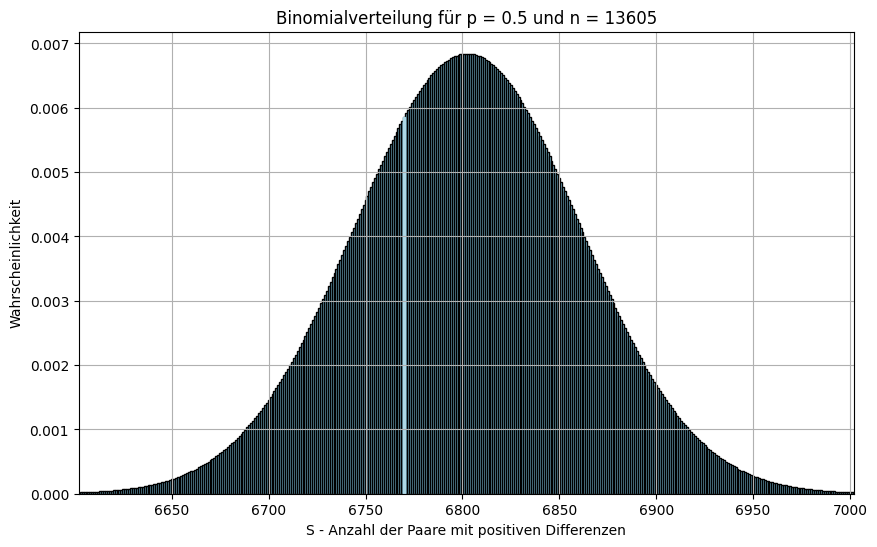

In [17]:
# Plot des Balkendiagramms
plt.figure(figsize=(10, 6))
plt.bar(x, binom_dist, width=1.0, color='skyblue', edgecolor='black')

# Den Balken bei Index 6770 rot markieren
plt.bar(x[6770], binom_dist[6770], width=1.0, color='lightblue', edgecolor='lightblue')

plt.title(f'Binomialverteilung für p = {wkeit} und n = {n}')
plt.xlabel('S - Anzahl der Paare mit positiven Differenzen')
plt.ylabel('Wahrscheinlichkeit')

# Wir Zoomen auf den Mittleren Bereichs des Plots, da die Wahrscheinlichkeiten
# weiter ausserhalb aufgrund der sehr großen Datenmengen sehr schnell sehr klein
# werden.
# Die folgende Zeile auskommentieren um den gesamten Plot zu sehen:
plt.xlim(n//2 - 200, n//2 + 200)

# Mit der folgenden Zeile kann man den angezeigten Bereich der Y-Achse festlegen
#plt.ylim(0, 0.00000025)

plt.grid(True)
plt.show()

Der Plot zeigt die Nullverteilung der Teststatistik. Die Wahrscheinlichkeit für ein $S$ von 6770 ist im Plot hellblau markiert.

## 5. Annahme und Ablehungsbereich für die Nullhypothese bestimmen

Mit der Festlegung des Signifikanzniveaus auf $α=0,05$ sagen wir, dass wir einen Unterschied in der Feinstaubbelastung zwischen Tag und Nacht annehmen (also die Nullhypothese verwerfen), wenn die Wahrscheinlichkeit für einen reinen Zufallsbefund kleiner als das Signifikanzniveau, also z. B. 5 % ist.

Für welche Werte von 𝑆 trifft das zu?


#### **Optional**: Annahme und Ablehnungsbereich am kleinen Beispiel

Wir schauen uns zunächst noch einmal unser stark reduziertes Problem an, in dem wir nur 10 Datenpunkte betrachten. Im Abschnitt "Binomialverteilung am kleinen Beispiel" haben wir die Wahrscheinlichkeiten für die verschiedenen Werte die $S$ in diesem Fall annehmen kann bereits bestimmt. Sie sind in der Variable binom_dist_klein hinterlegt.

Unser Signifikanzniveau haben wir auf $\alpha=0,5$ festgelegt.

Mit diesem Wissen können wir nun unsere zuletzt formulierte Frage beantworten.
Die Nullhypothese wird abgelehnt, wenn unser Experiment einen Wert für $S$ erzielt, bei dem gilt, dass die Wahrscheinlichkeit einen solchen oder extremeren Wert zu erzielen, kleiner als 5% ist.

Wir summieren die Werte vom Rand her auf um zu schauen wie weit wir gehen können, bevor wir die 5% überschreiten. Achtung: wir müssen beide Randbereiche berücksichtigen.

In [18]:
# Wir betrachten die beiden Falle, dass S=0 oder dass S=10 ist.
# Die Summe der Wahrscheinlichkeiten für diese beiden Fälle
# können wir wie folgt berechnen:
wkeit_0_10 = binom_dist_klein[0] + binom_dist_klein[10]
print(f"Die Wahrscheinlichkeit, das S=0 oder S=10 ist beträgt: {wkeit_0_10}")

# Bei 0 und 10 sind wir eindeutig noch im Ablehnungsbreich. Wir nehmen noch
# die Wahrscheinlichkeiten für 1 und 9 mit auf:
wkeit_0_1_9_10 = binom_dist_klein[0] + binom_dist_klein[1] + binom_dist_klein[9] + binom_dist_klein[10]
print(f"Die Wahrscheinlichkeit, das S <= 1 oder S>=9 ist beträgt: {wkeit_0_1_9_10}")

# Auch damit sind wir noch im Ablehnungsbereich. Wir nehmen noch die 2 und
# die 8 hinzu:
wkeit_0_1_2_8_9_10 = binom_dist_klein[0] + binom_dist_klein[1] + binom_dist_klein[2] + binom_dist_klein[8] + binom_dist_klein[9] + binom_dist_klein[10]
print(f"Die Wahrscheinlichkeit, das S<=2 oder S>=8 ist beträgt: {wkeit_0_1_2_8_9_10}")

print("\nHier haben wir die 5% eindeutig überschritten. Wir wissen jetzt, \ndass wir unsere Nullhypothese in diesem Fall ablehnen, wenn wir \nein S aus {0,1,9,10} erhalten.")

Die Wahrscheinlichkeit, das S=0 oder S=10 ist beträgt: 0.001953124999999999
Die Wahrscheinlichkeit, das S <= 1 oder S>=9 ist beträgt: 0.021484375
Die Wahrscheinlichkeit, das S<=2 oder S>=8 ist beträgt: 0.10937500000000008

Hier haben wir die 5% eindeutig überschritten. Wir wissen jetzt, 
dass wir unsere Nullhypothese in diesem Fall ablehnen, wenn wir 
ein S aus {0,1,9,10} erhalten.


So sieht es aus, wenn wir die Summen von Hand berechnen. Bei großen Experimenten verwenden wir stattdessen eine Funktion, die uns die kumulierten Summen berechnet:

In [19]:
# Das Paket numpy hat die Funktion cumsum, die die Beträge kumuliert:
binom_dist_cumsum = np.cumsum(binom_dist_klein)

# Wir lassen uns die berechneten Werte ausgeben:

print("  S    Kumulierte Wahrscheinlichkeit")
print("------------")
for i, summe in enumerate(binom_dist_cumsum):
    # Gib i zweistellig aus und die Wahrscheinlichkeitswerte mit 6 Stellen
    # vor und 2 nach dem Komma
    print(f"{i:2} {summe*100:6.2f} %")

  S    Kumulierte Wahrscheinlichkeit
------------
 0   0.10 %
 1   1.07 %
 2   5.47 %
 3  17.19 %
 4  37.70 %
 5  62.30 %
 6  82.81 %
 7  94.53 %
 8  98.93 %
 9  99.90 %
10 100.00 %


Hier können wir jetzt direkt ablesen, dass bei S=2 die Kumulierte Wahrscheinlichkeit die 2,5% bereits überschritten hat. Da die Funktion symmetrisch ist haben wir, zusammen mit dem oberen Randbereich, bei S=2 oder S=8, unsere also 5% bereits überschritten.

Unser Ablehungsbereich ist also $S={0,1,9,10}$.
Der folgende Plot zeigt den Ablehnungsbereich für unser kleines Beispiel mit rot markierten Balken.

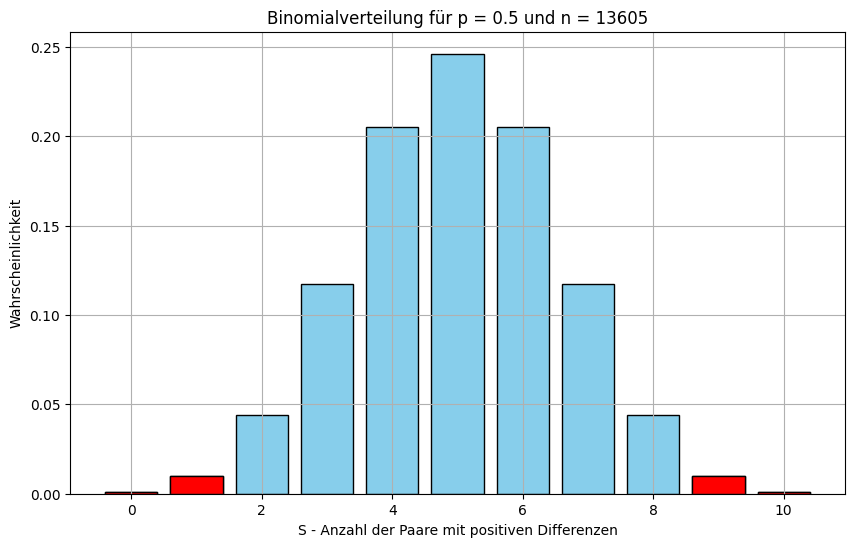

In [20]:
# Die folgenden Zeilen erstellen den Plot, der die Wahrscheinlichkeiten für das
# Auftreten eines bestimmten Wertes für S zeigt.
plt.figure(figsize=(10, 6))
plt.bar(S, binom_dist_klein, width=0.8, color='skyblue', edgecolor='black')

# Den Ablehnungsbereich rot markieren
plt.bar(x[0], binom_dist_klein[0], width=0.8, color='red', edgecolor='black')
plt.bar(x[1], binom_dist_klein[1], width=0.8, color='red', edgecolor='black')
plt.bar(x[9], binom_dist_klein[9], width=0.8, color='red', edgecolor='black')
plt.bar(x[10], binom_dist_klein[10], width=0.8, color='red', edgecolor='black')

plt.title(f'Binomialverteilung für p = {wkeit} und n = {n}')
plt.xlabel('S - Anzahl der Paare mit positiven Differenzen')
plt.ylabel('Wahrscheinlichkeit')
plt.grid(True)
plt.show()

#### Annahme und Ablehnungsbereich bestimmen


Wie auch im kleinen Beispiel müssen wir auch hier die Werte vom Rand her aufsummieren um zu schauen wie weit wir gehen können, bevor wir die 5% überschreiten. Da wir hier sehr viele Werte betrachten müssen, machen wir dies nicht von Hand. Stattdessen berechen wir die kumulierten Summen direkt für alle Werte und schauen dann, ann welcher Stelle wir die 2,5% am unteren und die 97,5% am oberen Rand der Kurve überschreiten.

In [21]:
# Das Paket numpy hat die Funktion cumsum, die die Beträge kumuliert:
binom_dist_cumsum = np.cumsum(binom_dist)

# Nun müssen wir schauen, wann die kumulierten Wahrscheinlichkeiten die 2,5%
# überschreiten:
# Bestimmen des ersten Index, an dem der Wert größer als 0,025 ist
first_index_greater_than_0_025 = np.argmax(binom_dist_cumsum > 0.025)

print(first_index_greater_than_0_025)

last_index_smaller_than_0_975 = np.argmin(binom_dist_cumsum < 0.975)

print(last_index_smaller_than_0_975)


6688
6917


Bei 6688 sind die 2,5% überschritten. Da die Funktion Symmetrisch ist, haben wir am oberen Rand der Kurve die 2,5% an derselben Stelle (13605-6688=6917) auch überschritten.

Der Ablehnungsbereich ist also der Bereich für $S=[0;6688]~ \cup ~[6917;16044]$.
Der folgende Plot zeigt diesen Bereich in rot markiert.

S betrachten.

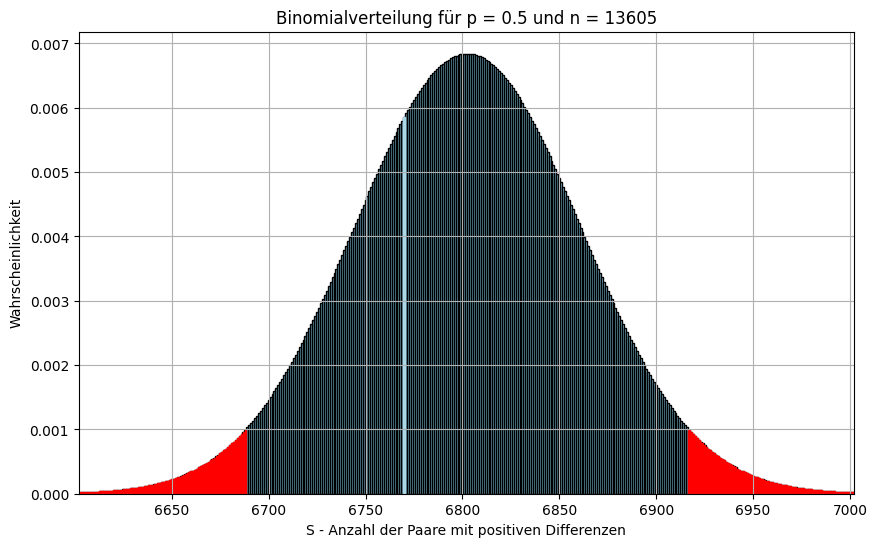

In [22]:
# Plot des Balkendiagramms
plt.figure(figsize=(10, 6))
plt.bar(x, binom_dist, width=1.0, color='skyblue', edgecolor='black')

# Den Ablehnungsbereich rot markieren
plt.bar(x[0:6689], binom_dist[0:6689], width=0.8, color='red', edgecolor='red')
plt.bar(x[6917:16045], binom_dist[6917:16045], width=0.8, color='red', edgecolor='red')

# Den Balken bei Index 6770 blau markieren
plt.bar(x[6770], binom_dist[6770], width=1.0, color='lightblue', edgecolor='lightblue')


plt.title(f'Binomialverteilung für p = {wkeit} und n = {n}')
plt.xlabel('S - Anzahl der Paare mit positiven Differenzen')
plt.ylabel('Wahrscheinlichkeit')

# Wir Zoomen auf den Mittleren Bereichs des Plots, da die Wahrscheinlichkeiten
# weiter ausserhalb aufgrund der sehr großen Datenmengen sehr schnell sehr klein
# werden.
# Die folgende Zeile auskommentieren um den gesamten Plot zu sehen:
plt.xlim(n//2 - 200, n//2 + 200)

# Mit der folgenden Zeile kann man den angezeigten Bereich der Y-Achse festlegen
#plt.ylim(0, 0.00000025)

plt.grid(True)
plt.show()

Unser Ablehnungsbereich ist im obigen plot nun rot markiert. Wenn wir beim auszählen der positiven Differenzen ein $S$ erhalten hätten das in in diesen Bereich fällt, dann hätten wir die Nullhypothese verwerfen können und unsere Alternativhypothese annehmen können.
Unser $S=6770$ ist im Plot hellblau markiert und liegt nicht im Ablehnungsbereich, d.h. wir können die Nullhypothese nicht ablehnen.

Aus diesem Experiment erhalten wir keinen Erkenntnisgewinn, denn wir können die Nullhypothese auch nicht als richtig annehmen. Es bleibt uns nur, die Daten zu prüfen, unser Experimentensetting zu überdenken oder unser Alternativhypothese neu zu formulieren.

#Hypothese 2

**Hypothese 2**: "Es gibt einen Zusammenhang zwischen dem Luftdruck und der Feinstaubbelastung der Luft."

**Nullhypothese 2:** "Es gibt keinen Zusammenhang zwischen dem Luftdruck und der Feinstaubbelastung der Luft."

**Hypothese 2** ist eine ungerichtete Zusammenhangshypothese (siehe Link Modul). Zu ihrer Untersuchung wird eine Korrelationsanalyse durchgeführt. Die Korrelationsanalyse ist ein statistisches Verfahren zur Ermittlung der Stärke und Richtung eines linearen Zusammenhangs zwischen zwei oder mehr Variablen.
(siehe auch: https://datatab.de/tutorial/korrelation).

Der Korrelationskoeffizient "r" gibt an, wie stark der Zusammenhang zwischen zwei Werten ist. Er kann Werte zwischen -1 und +1 annehmen. Mit Hilfe einer Korrelationsanalyse kann somit festgestellt werden, wie stark und in welche Richtung zwei Werte zusammenhängen.

Positive Korrelationen liegen vor, wenn die Zunahme der Variablen A auch zu einer Zunahme der Variablen B führt. Beispielsweise korreliert die Körpergröße positiv mit dem Gewicht.

Bei negativen Korrelationen führt die Zunahme der Variablen A zu einer Abnahme der Variablen B. Ein Beispiel hierfür ist die Korrelation zwischen der Kraftstoffmenge im Auto und der Länge der zurückgelegten Strecke.

Wenn der Korrelationskoeffizient nahe bei 0 liegt, besteht keine lineare Beziehung zwischen den Variablen.

**Wert "r" und Stärke des Zusammenhangs**
+ 0,0 < 0,1	kein Zusammenhang
+ 0,1 < 0,3	geringer Zusammenhang
+ 0,3 < 0,5	mittlerer Zusammenhang
+ 0,5 < 0,7	hoher Zusammenhang
+ 0,7 < 1	sehr hoher Zusammenhang

Kuckartz, U., Rädiker, S., Ebert, T., & Schehl, J. (2013). Statistik: eine verständliche Einführung. Wiesbaden, S. 213, eBook Download: https://link.springer.com/book/10.1007/978-3-531-19890-3

**Vorsicht**: Die Korrelation misst die Stärke des Zusammenhangs zwischen zwei Variablen. Sie sagt jedoch nichts darüber aus, ob eine Variable die andere verursacht (Kausalität). Korrelationsanalysen sind in erster Linie ein nützliches Instrument, um erste Hinweise auf Zusammenhänge zwischen Variablen zu erhalten, bevor tiefergehende Kausalanalysen durchgeführt werden.


##Durchführung der Analyse
Für unsere Auswertung verwenden wir die Korrelationsanalyse nach Pearson. Die Korrelationsanalyse nach Pearson untersucht den linearen Zusammenhang zwischen zwei metrischen Variablen, z. B. um festzustellen, ob eine Variable steigt oder sinkt, wenn die andere steigt. Um die Pearson-Analyse durchführen zu können, müssen folgende Voraussetzungen erfüllt sein:

1. Der Zusammenhang zwischen den Variablen sollte linear sein, was durch Streudiagramme überprüft werden kann.
2. Insbesondere bei kleinen Stichproben sollten die Daten der Variablen annähernd normalverteilt sein.


###Signifikanzniveau festlegen
Mit einem Hypothesentest kann die Nullhypothese nie mit 100%iger Sicherheit verworfen oder bestätigt werden. Es besteht immer eine Irrtumswahrscheinlichkeit. Das liegt daran, dass für die Analyse immer eine Stichprobe aus der Grundgesamtheit gezogen wird. Wenn z.B. eine WählerInnenbefragung durchgeführt wird, werden nicht alle möglichen WählerInnen befragt, sondern es wird eine Stichprobe aus der Grundgesamtheit der WählerInnen gezogen, welche die Eigenschaften der WählerInnengruppe am besten repräsentiert. Eine andere Stichprobe aus der selben Grundgesamtheit könnte jedoch zu etwas anderen Ergebnissen bei der Analyse führen, insbesondere wenn die Stichprobe aus irgendeinem Grund von vornherein zu sehr von der Grundgesamtheit abweicht. Daher ist jede Aussage über eine Hypothese immer mit einer Irrtumswahrscheinlichkeit behaftet.

Diese Irrtumswahrscheinlichkeit wird als Signifikanzniveau (α) bezeichnet.
Das **Signifikanzniveau** wird immer vor der Analyse bestimmt. Es liegt häufig zwischen 1&#8239;% und 5&#8239;%. Bei einem Signifikanzniveau von 5&#8239;% ($α=0,05$) besteht ein Risiko von 5&#8239;%, dass die Nullhypothese verworfen wird, obwohl sie eigentlich wahr ist.

Auch für unseren Korrelationstest legen wir das Signifikanznevieau auf $α=0,05$.


###Streudiagramm

Ein Streudiagramm (auch Scatterplot genannt) ist eine grafische Darstellung, die verwendet wird, um die Beziehung zwischen zwei numerischen Variablen darzustellen. Jeder Punkt im Diagramm repräsentiert ein Datenpaar, wobei die Position entlang der x-Achse den Wert der einen Variable und die Position entlang der y-Achse den Wert der anderen Variable zeigt. Streudiagramme eignen sich besonders gut, um Zusammenhänge, Muster oder Ausreißer in den Daten zu erkennen, wie etwa positive oder negative Korrelationen zwischen den Variablen (siehe auch Link zum Modul).

Ein Streudiagramm kann auch zur ersten visuellen Abschätzung eines liniearen Zusammenhangs zwischen Feinstaub und Luftdruck verwendet werden.  

<Axes: xlabel='Luftdruck', ylabel='Feinstaub'>

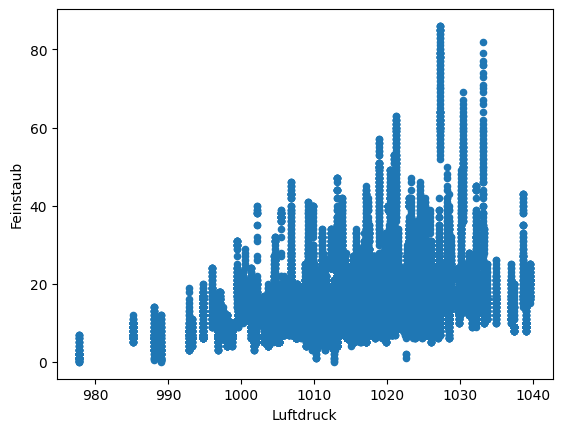

In [23]:
daten.plot(kind='scatter', x='Luftdruck', y='Feinstaub')

Im Diagramm ist ein leichter linearer Zusammenhang zwischen Feinstaubbelastung und Luftdruck ersichtlich. Das Diagramm zeigt in Ansätzen, dass die Werte für den Feinstaub bei einem erhöten Luftdruck auch steigen. Der Zusammenhang scheint aber nicht auschließlich linear zu sein. Dafür sind zu viele sogenannte Ausreiser sichtbar. Ausreisser sind Meßwerte, die stark von der gesamten Messreihe abweichen.

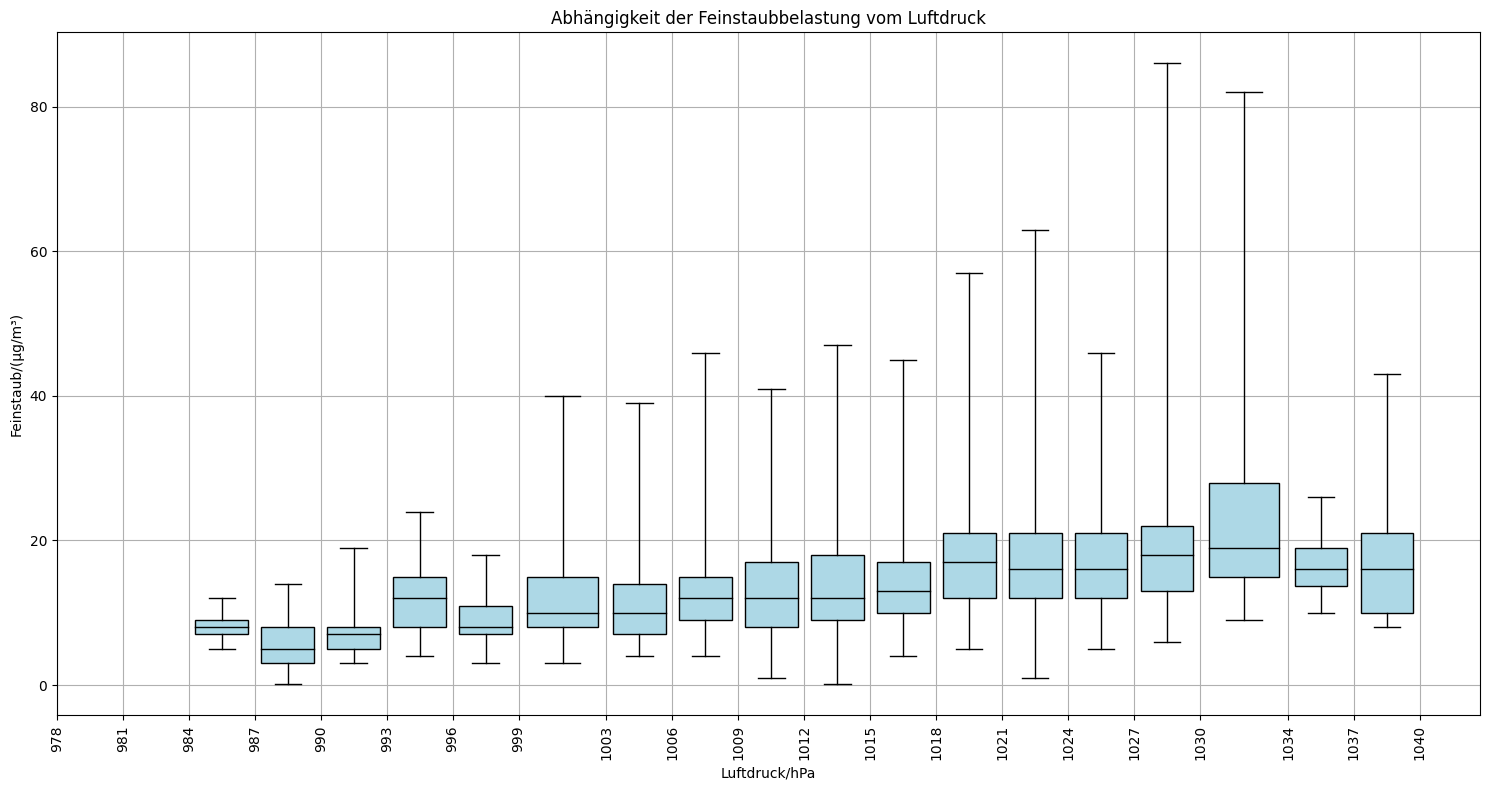

In [27]:
# Define the number of bins
n_bins = 20

# Filtering out NaN values from 'Luftdruck' and 'Feinstaub'
filtered_data = daten.dropna(subset=['Luftdruck', 'Feinstaub']).copy()

# Create Luftdruck bins
min_luftdruck = filtered_data['Luftdruck'].min()
max_luftdruck = filtered_data['Luftdruck'].max()
bins = np.linspace(min_luftdruck, max_luftdruck, n_bins + 1)

# Round the bins to the nearest integer
bins = np.round(bins).astype(int)

# Assign each Luftdruck value to a bin using .loc
filtered_data.loc[:, 'Luftdruck_bin'] = pd.cut(filtered_data['Luftdruck'], bins, include_lowest=True)

# Group the data by Luftdruck_bin and specify observed=False to retain current behavior
grouped = filtered_data.groupby('Luftdruck_bin', observed=False)['Feinstaub']

# Prepare the data for boxplot
boxplot_data = [group.tolist() for name, group in grouped]

# Create midpoints for the bins to center the boxplots
bin_edges = bins
bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plotting
plt.figure(figsize=(15, 8))
bplot = plt.boxplot(boxplot_data, positions=bin_midpoints, whis=(0, 100), widths=np.diff(bin_edges) * 0.8, patch_artist=True)
for patch in bplot['boxes']:
    patch.set_facecolor("lightblue") #THK_ORANGE
for median in bplot['medians']:
    median.set(color="black")

# Adding plot details
plt.xlabel('Luftdruck/hPa')
plt.ylabel('Feinstaub/(μg/m³)')
plt.title('Abhängigkeit der Feinstaubbelastung vom Luftdruck')
plt.xticks(ticks=bin_edges, labels=[f"{int(edge)}" for edge in bin_edges], rotation=90)  # Ticks at bin edges
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

###Normalverteilung
Viele statistische Tests setzen eine Normalverteilung der Daten voraus, da viele natürliche Phänomene (z. B. Körpergröße, Blutdruck) annähernd normalverteilt sind. Die Normalverteilung ist daher eine Wahrscheinlichkeitsverteilung, die eine Glockenkurve oder Gauß-*Kurve* beschreibt. Ihr Kurvenverlauf ist symmetrisch, wobei Modalwert, Median und arithmetischer Mittelwert identisch sind (siehe auch Modul XX Verteilung von Daten). Auch die Binomialverteilung, die Sie weiter oben bereits kennengelernt haben, ist eine Normalverteilung. Siehe auch https://datatab.de/tutorial/test-auf-normalverteilung.


Auch für die Korrelationsanalyse wird insbesondere bei kleinen Stichproben eine annähernde Normalverteilung vorausgesetzt. Für unseren Test werden wir die Normalverteilung grafisch überprüfen, indem wir die Werte für Feinstaub und Luftdruck in einem Histogramm darstellen.

#### Visuelle Prüfung auf Normalverteilung


Ob die Werte eines Datensatzes normalverteilt sind lässt sich auch mit statistischen Tests überprüfen. Wer sich dazu einlesen möchte findet z.B. hier eine einfache Einführung: [datatab.de](https://datatab.de/tutorial/test-auf-normalverteilung).


Da die Überprüfung anhand eines statistischen Tests den Rahmen der Veranstaltung sprengen würde, konzentrieren wir uns hier auf die visuelle Überprüfung.

Mit Hilfe eines Histogramms können wir uns einen Eindruck über die Verteilung der Daten verschaffen. In "Modul 4.1: Daten auswerten" Abschnitt "Schiefe, Wölbung, Exzess" haben wir Verteilungen untersucht und gesagt, dass die Schiefe einer Verteilung durch die Position von arithmetischem Mittel, Modalwert und Medianwert beschrieben werden kann. Man sagt die Verteilung ist symmetrisch, wenn gilt, dass Modus, Median und Mean der Verteilung in etwa übereinstimmen.

Wir schauen uns also zunächst die Histogramme unserer Daten an.

**Histogramm Luftdruck**

In [ ]:
print("Histogramm Luftdruck")
daten['Luftdruck'].plot.hist(bins=200)

In [ ]:
from statistics import mode

print("Mean: " + str(daten['Luftdruck'].mean()))
print("Median: " + str(daten['Luftdruck'].median()))
print("Modus: " + str(daten['Luftdruck'].mode()[0]))


Die Verteilung der Luftdruckdaten scheint symmetrisch zu sein und auch die Werte für Median, Mittelwert und Modus der Daten liegen nahe beieinander. Für die Untersuchung kann hier von einer Normalverteilung der Daten ausgegangen werden.

**Histogramm Feinstaub**

In [ ]:
daten['Feinstaub'].plot.hist(bins=200)

In [ ]:
print("Mean: " + str(daten['Feinstaub'].mean()))
print("Median: " + str(daten['Feinstaub'].median()))
print("Modus: " + str(daten['Feinstaub'].mode()[0]))

Die Daten für den Feinstaub sind leicht rechtsschief.

Wenn die Daten leicht rechtsschief sind, kann dies die Ergebnisse der Pearson-Korrelation beeinflussen, aber im Allgemeinen ist die Pearson-Korrelation relativ robust gegenüber kleinen Abweichungen von der Normalverteilung. [^1].


---


[^1] Hauke, J., & Kossowski, T. (2011). Comparison of values of Pearson’s and Spearman’s correlation coefficients on the same sets of data. Quaestiones Geographicae, 30(2), 87-93.

---

(**TODO: Referenz prüfen**)

###Korrelationsanalyse nach Pearson

Die Korrelationsanalyse nach Pearson ist im Paket scipy bereits implementiert und kann nach dem import des Pakets einfach verwendet werden. Allerdings kann die Methode keine fehlenden Werte verarbeiten, deshalb entfernen wir diese mit `dropna()` aus der Verteilung, bevor wir die Verteilung an die Funktion übergeben.

In Kombination mit dem Signifikanzniveau wird häufig mit einem sogenannten $p$-Wert gearbeitet:

Der  $p$-Wert ist ein Maß das anzeigt, wie wahrscheinlich es ist, dass der Ausgang eines Versuchs zufällig zustande gekommen ist wenn eigentlich kein Effekt existiert (also wenn die Nullhypothese stimmt). Der $p$-Wert gibt an wie wahrscheinlich es ist, dass ein beobachteter Unterschied zwischen Gruppen (Beispiel für Gruppen einfügen) zufällig auftritt.

+ **Kleiner p-Wert** (z.&#8239;B. unter dem Signifikanzniveau $α = 0,05$): Es ist unwahrscheinlich, dass das Ergebnis zufällig ist, daher gehen wir davon aus, dass ein Effekt vorliegt,  und wir verwerfen die Nullhypothese. (Wir dürfen die Nullhypothese aber nur auf dem Signifikanzniveau $\alpha$ ablehnen! Auch wenn $p$ die Wahrscheinlichkeit dafür angibt, dass der Effekt auf Zufall beruht, ist er eben nur ein Schätzwert und eben nicht das Signifikanzniveau, vergl. [*green jelly beans linked to acne*](https://xkcd.com/882/).

+ **Großer p-Wert** (z. B. über dem Signifikanzniveau $\alpha = 0,05)$: (`Erklärung anhand von konkreten Daten hinter dem Vorzeichentest oder hinter dem Signifikanztest`)
Das Ergebnis kann gut durch Zufall erklärt werden, und wir müssen es daher auch durch Zufall erklären. Allerdings können wir auch einen Fehler 2.&nbsp;Art machen, und bei dem wissen wir nicht, wie hoch der ist. Die Irrtumswahrscheinlichkeit ist in diesem Fall unkalkulierbar. Wir dürfen die Nullhypothese also nicht einfach annehmen. Ablehnen können wir sie aber auch nicht. Gegebenenfalls müssen wir das Experiment mit einer höheren Stichprobengröße wiederholen (dadurch nimmt die Standardabweichung ab und die Trennfähigkeit des Tests,*power* wird höher).


Aufgrund des p-Werts wird der Effekt wie folgt interpretiert:
+ p < 0,01 : hoch signifikant

+ p < 0,05 : signifikant

+ p  ≥ 0,05 : nicht signifikant

Video zum p-Wert:
https://www.youtube.com/watch?v=NW-_u3vXJhk

In [ ]:
from scipy import stats

#calculation correlation coefficient and p-value between x and y
r, p_value =stats.pearsonr(daten.dropna()['Feinstaub'], daten.dropna()['Luftdruck'])
print("Das Ergebnis des Korrelationstest liefert einen Korrelationskoefizient r = " + str(r) + " der auf einen mittleren Zusammenhang zwischen Luftdruck und Feinstaub hinweist mit einem p-Wert von p = " + str("{:.20f}".format(p_value)) )

# Interpret the results:
alpha = 0.05
if p_value < alpha:
    print("Die Nullhypothese wird verworfen; es gibt einen signifikanten linearen Zusammenhang zwischen Luftdruck und Feinstaubbelastung.")
else:
    print("Die Nullhypothese kann nicht verworfen werden; Es gibt keinen signifikant linearen Zusammenhang zwischen der Luftdruck und der Feinstaubbelastung.")


Als Ergebnis der Korrelationsanalyse erhalten wir die Werte r=0,38 und p=0,0

Der p-Wert kann von der Größe der Stichporbe beinflusst werden. Je größer die Stichprobe, desto kleiner der p-Wert. So ist er in unserer Korrelationsanalyse annährend Null, siehe auch: https://datatab.de/tutorial/test-auf-normalverteilung#Graphische).
Der liegt somit unter dem festgelegten Signifikanzniveau von α =0,05, was auf einen signifikanten linearen Zusammenhang hinweist. Die Nullhypothese kann somit verworfen werden.
Trotz dieser Werte sollten die Ergebnisse immer kritisch betrachtet werden. Der p-Wert gibt nur die Wahrscheinlichkeit an, unter der die Nullhypothese verworfen werden kann. Es kann immer zu Fehlinterpretationen kommen die in der Statistik als Fehlern erster und zweiter Ordnung bezeichnet werden.

Ein **Fehler erster Ordnung** liegt vor, wenn die Nullhypothese verworfen wird, obwohl sie in Wirklichkeit wahr ist.

Ein **Fehler zweiter Ordnung** liegt vor, wenn die Nullhypothese nicht verworfen wird, obwohl sie falsch ist. Dies bedeutet, dass ein tatsächlicher Effekt übersehen wird.

Um Fehlinterpretationen zu vermeiden, kann das Signifikanzniveau auf 1% (a = 0,01) gesenkt werden. Damit wird es aber auch schwieriger, die Alternativhypothese zu bestätigen. Es ist wichtig, bei jeder Analyse abzuwägen und die Ergebnisse kritisch zu hinterfragen.


#Hypothese 1 -- t-Test

**Hypothese 2**: "*Es gibt einen Unterschied zwischen der Feinstaubbelastung
der Luft am Tag und in der Nacht (Vermutung: tagsüber höher).*"

**Nullhypothese 2**: "Es gibt keinen Unterschied zwischen der Feinstaubbelastung
der Luft am Tag und in der Nacht *kursiver Text*"

Für diese Hypothese muss geprüft werden ob zwei unabhängige Verteilungen, die der Werte am Tag und die der Werte in der Nacht, sich signifikant voneinander unterscheiden. Dies kann man beispielsweise mit einem t-Test überprüfen.



#### Signifikanzniveau (Irrtumswahrscheinlichkeit)

Ein Hypothesentest kann die Nullhypothese nie mit absoluter Sicherheit verwerfen. Es besteht immer eine gewisse Irrtumswahrscheinlichkeit, dass die Nullhypothese abgelehnt wird, obwohl sie eigentlich wahr ist. Diese Irrtumswahrscheinlichkeit wird Signifikanzniveau oder α genannt [1].


---

[1] DATAtab, "Hypothesentest", https://datatab.de/tutorial/hypothesentest, abgerufen: 2024-09-12

###Vorbereitung der Datensätze


Um diese Hypothese zu untersuchen vergleichen wir zwei Verteilungen, nämlich die der Feinstaubbelastung am Tag und der in der Nacht. Wir müssen uns also zwei Subsets der Daten erstellen, die jeweils die Werte der Feinstaubbelastung am Tag und der in der Nacht enthalten.
Um diese Subsets bilden zu können müssen wir für uns zunächst definieren was Tag ist und was Nacht. Da es hierzu wohl verschiedene Meinungen gibt versuchen wir Kernbereiche zu definieren die eindeutig Tag oder Nacht zuzuordnen sind.
Im Folgenden wählen wir für den Tag den Zeitraum zwischen 7 Uhr und 18 Uhr und für die Nacht den Zeitraum zwischen 20 Uhr und 5 Uhr morgens. Unter dieser Annahme markieren wir unsere Zellen entsprechend als Tag oder Nacht.

In [ ]:
daten_tag = daten.loc[(daten["Uhrzeit"] >= "07:00") & (daten["Uhrzeit"] <= "18:00") ]
daten_nacht = daten.loc[(daten["Uhrzeit"] >= "20:00") | (daten["Uhrzeit"] <= "05:00") ]

print(daten_tag['Uhrzeit'].unique())
print(daten_nacht['Uhrzeit'].unique())

### Überblick über die Daten verschaffen

Wir können uns an dieser Stelle schon mal einen schnellen Überblick über die Daten verschaffen, indem wir einen Boxplot erstellen.

In [ ]:
plotdata = [daten_tag['Feinstaub'], daten_nacht['Feinstaub']]
data = pd.DataFrame(plotdata).T
data.columns = ['day', 'night']

import matplotlib.pyplot as plt

boxplot = data.boxplot(column=['day', 'night'])
boxplot.plot()
plt.show()

Am Boxplot können wir bereits ablesen, dass die Verteilungen sehr ähnlich sind. Hier ist kein signifikanter Unterschied zwischen den beiden Verteilungen zu erwarten. Aber um ganz genau zu sein führen wir als nächstes den t-Test durch.

### Vorbedingungen für den t-Test prüfen


Für die Untersuchung verwenden wir einen t-Test. Dieser ermöglicht es uns zu untersuchen ob zwei Verteilungen sich voneinander unterscheiden. Ein t-Test macht allerdings einige Annahmen über die Daten, die zutreffen müssen, damit der Test korrekte Ergebnisse liefert:

1.   **Die Beobachtungen / Werte müssen unabhängig voneinander sein.** Das bedeutet, dass es keinen (bekannten) Zusammenhang zwischen den einzelnen Beobachtungen geben darf. Also der Wert einer Beobachtung keinen Einfluss auf den Wert einer anderen Beobachtung haben soll. Ein Zusammenhang wäre bspw. gegeben, wenn Körpergröße und Gewicht betrachtet wird, oder Alter und Gesundheitszustand.
2.   **Die Werte / Beobachtung müssen normalverteilt sein.** Eine Verteilung gilt als normalverteilt, wenn die Verteilung Symmetrisch ist, ihr Erwartungswert bzw. die Mitte der Verteilung bei null liegt und die Standardabweichung bzw. Varianz eins ist. Die Normalität kann visuell anhand von z.B. Histogrammen beurteilt werden (vgl. Modul 4.1 Schiefe, Wölbung und Exzess). Der t-Test ist in Bezug auf die Normalverteilung relativ robust wenn eine ausreichend große Menge an Daten vorliegt.
3.   **Die Varianzen beider Verteilungen müssen (ungefähr) gleich sein.**
Die Varianzen der Verteilungen können zum (wie in Modul 4.1 Streuungswerte) berechnet werden oder z.B. mithilfe von Boxplots visuell verglichen werden.

Wenn diese Annahmen von den zu testenden Daten nicht erfüllt werden, dann würde der t-Test keine validen Ergebnisse liefern. In diesem Fall sollte ein anderer Test gewählt werden. Um also den t-Test durchführen zu können und dabei sicher zu sein, dass wir sinnvolle Ergebnisse erhalten müssen wir zunächst kurz prüfen ob diese Prämissen erfüllt sind.

#### Unabhängigkeit der Werte

An dieser Stelle stehen wir vor der Frage ob die Feinstaubwerte des Tages Einfluss nehmen auf die der Nacht bzw. ob die Werte der Nacht Einfluss nehmen auf die Werte des Tages.

Das Umweltbundesamt schreibt dazu auf seiner [Seite](https://www.umweltbundesamt.de/daten/luft/feinstaub-belastung#witterungsabhangigkeit):

Wie sehr sich die Feinstaubbelastung ändert "hängt entscheidend davon ab, wie schnell ein Austausch mit der Umgebungsluft erfolgen kann. Winterliche Hochdruckwetterlagen mit geringen Windgeschwindigkeiten führen dazu, dass die Schadstoffe nicht abtransportiert werden können. Sie sammeln sich in den unteren Luftschichten (bis etwa 1.000 Meter) wie unter einer Glocke. Der Wechsel zu einer Wettersituation mit stärkerem Wind führt zu einer raschen Abnahme der PM10-Belastung."

Dies bedeutet, dass die Daten nicht sicher unabhängig voneinander sind, sondern dies auch von der Wetterlage abhängt.
Für die weitere Untersuchung nehmen wir eine günstige Wetterlage an, behalten diese Schwachstelle bei der Voruntersuchung aber im Hinterkopf.

#### Normalverteilung der Daten

Ob die Werte eines Datensatzes normalverteilt sind lässt sich auch mit statistischen Tests überprüfen. Wer sich dazu einlesen möchtet findet z.B. hier eine einfache Einführung: [Linktext](https://datatab.de/tutorial/test-auf-normalverteilung).


Aber wir konzentrieren uns der einfachheit halber auf die visuelle Überprüfung. Mit Hilfe eines Histgramms können wir uns einen Eindruck über die Verteilung der Daten verschaffen. In "Modul 4.1: Daten auswerten" Abschnitt "Schiefe, Wölbung, Exzess" haben wir Verteilungen untersucht und gesagt, dass die Schiefe einer Verteilung durch die Position von arithmetischem Mittel, Modalwert und Medianwert beschrieben werden kann. Man sagt die Verteilung ist symmetrisch (bzw. Normalverteilt), wenn gilt Modus, Median und Mean der Verteilung in etwa übereinstimmen.

In [ ]:
plt.hist(daten_tag['Feinstaub'], bins=200)
plt.show()

plt.hist(daten_nacht['Feinstaub'], bins=200)
plt.show()

In [ ]:
print("Mean: " + str(daten_tag['Feinstaub'].mean()))
print("Median: " + str(daten_tag['Feinstaub'].median()))
print("Modus: " + str(daten_tag['Feinstaub'].mode()[0]))

print("Mean: " + str(daten_nacht['Feinstaub'].mean()))
print("Median: " + str(daten_nacht['Feinstaub'].median()))
print("Modus: " + str(daten_nacht['Feinstaub'].mode()[0]))

Die Histogramme unserer Datensätze zeigen, dass die Verteilungen der Werte leicht rechtsschief sind. Da die Schiefe aber nur leicht ausgeprägt ist und wir eine wirklich große Stichprobe zur Verfügung haben können wir die leicht Schiefe aber vernachlässigen, da der t-Test bei größeren Stichproben robuster gegenüber Schiefe ist. Der zentrale Grenzwertsatz sorgt dafür, dass der Mittelwert der Stichprobe eher normalverteilt ist, selbst wenn die zugrunde liegende Verteilung leicht schief ist. [1,2]

(Falls die Daten stark schief sind, könnten alternative Tests, wie z.B. der Wilcoxon-Rangsummen-Test (für unverbundene Stichproben) oder der Wilcoxon-Vorzeichen-Rang-Test (für verbundene Stichproben), sinnvoller sein, da diese Tests keine Normalverteilungsannahme machen. [3,4])


---


[1] Lumley, T., Diehr, P., Emerson, S., & Chen, L. (2002). The Importance of the Normality Assumption in Large Public Health Data Sets. Annual Review of Public Health, 23(1), 151-169.

[2] Moore, D. S., McCabe, G. P., & Craig, B. A. (2012). Introduction to the Practice of Statistics (7th ed.). New York: W.H. Freeman and Company.

[3] Conover, W. J. (1999). Practical Nonparametric Statistics (3rd ed.). New York: John Wiley & Sons.

[4] Hollander, M., Wolfe, D. A., & Chicken, E. (2013). Nonparametric Statistical Methods (3rd ed.). New York: John Wiley & Sons.


---


TODO: Referenzen prüfen

#### Gleicheit der Varianzen

Die Varianz ist ein Streuungswert einer Verteilung.  In "Modul 4.1: Daten auswerten" Abschnitt "Streuungswerte" haben wir die Varianz bereits betrachtet und auch gelernt, wie man die Varianz einer Verteilung berechnen kann. Python berechnet die Varianz einer Verteilung mit dem Befehl var().

In [ ]:
print("Varianz der Verteilung am Tag: " + str(daten_tag['Feinstaub'].var()))
print("Varianz der Verteilung in der Nacht: " + str(daten_nacht['Feinstaub'].var()) + "\n")

Die Varianzen der Verteilungen am Tag und in der Nacht sind etwa gleich.

### T-Test durchführen

In [ ]:
import numpy as np
from scipy import stats
t_stat, p_value = stats.ttest_ind(daten_tag['Feinstaub'], daten_nacht['Feinstaub'], nan_policy='omit')

print("Das Ergebnis des t-Tests liefert: test=" + str(t_stat) + "  p=" + str(p_value) )

# Interpret the results:
alpha = 0.05
if p_value < alpha:
    print("Die Nullhypothese wird abgelehnt; es gibt einen signifikanten Unterschied zwischen der Feinstaubbelastung am Tag und in der Nacht.")
else:
    print("Die Nullhypothese kann nicht abgelehnt werden; es gibt keinen signifikanten Unterschied zwischen der Feinstaubbelastung am Tag und in der Nacht.")